## Task 1 - Load and visualize an image

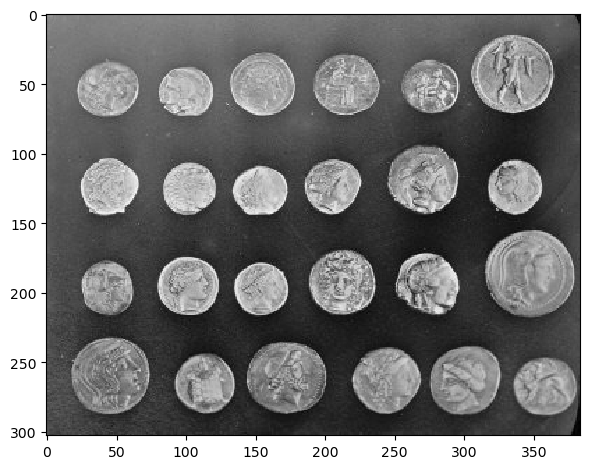

./coins.jpg
Grayscale image
Shape (303, 384)
Dtype uint8
Intensity of random pixel [296,297] 38


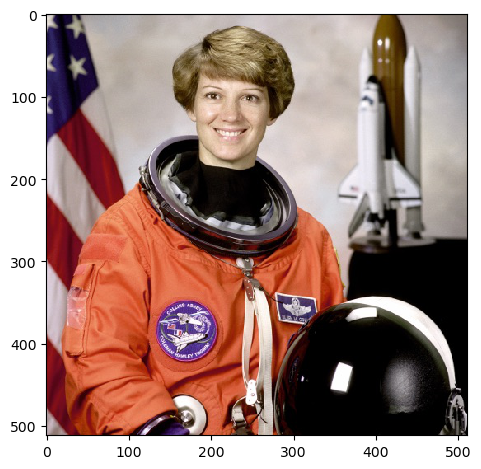

./astronaut.jpg
Color image
Shape (512, 512, 3)
Dtype uint8
Intensity of random pixel [294,183] [223 111  73]


In [1]:
import os
import matplotlib.pyplot as plt
import random

import skimage
from skimage import io

FILE_PATH = "."

# Function to load a give image file, plot it and print some stats about the image
def load_show(fn): 
    image = io.imread(fn)
    skimage.io.imshow(image)
    skimage.io.show()
    print(fn)

    if len(image.shape) == 3:
        print("Color image")
    else:
        print("Grayscale image")
        
    print("Shape", image.shape)
    print("Dtype", image.dtype)
    randx = random.randint(0, image.shape[0])
    randy = random.randint(0, image.shape[1])
    print("Intensity of random pixel", f"[{randx},{randy}]", image[randx,randy])

load_show(os.path.join(FILE_PATH,'coins.jpg'))
load_show(os.path.join(FILE_PATH,'astronaut.jpg'))

## Task 2 - Color space conversion

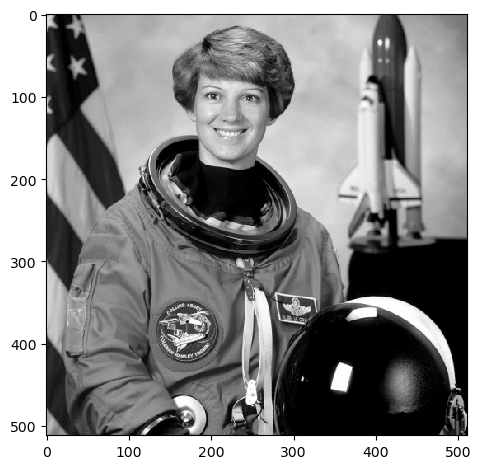

Shape and dtype for astronaut grayscale image: 2 float64
Range of values min/max 0.0 1.0


In [2]:
from skimage.color import rgb2gray
import numpy as np

coins_grayscale = io.imread(os.path.join(FILE_PATH,'coins.jpg'))
astronaut_rgb = io.imread(os.path.join(FILE_PATH,'astronaut.jpg'))
astronaut_gray = rgb2gray(astronaut_rgb)

# The coins image is already in grayscale
assert len(coins_grayscale.shape) == 2

skimage.io.imshow(astronaut_gray)
skimage.io.show()
print("Shape and dtype for astronaut grayscale image:", len(astronaut_gray.shape), astronaut_gray.dtype)
print("Range of values min/max", np.min(astronaut_gray), np.max(astronaut_gray))

After grayscale conversion the image size has been reduced from each pixel having 3 values (R,G,B) to a single value between 0 and 1 (the dtype is now float).

## Task 3 - Image rescale and resize

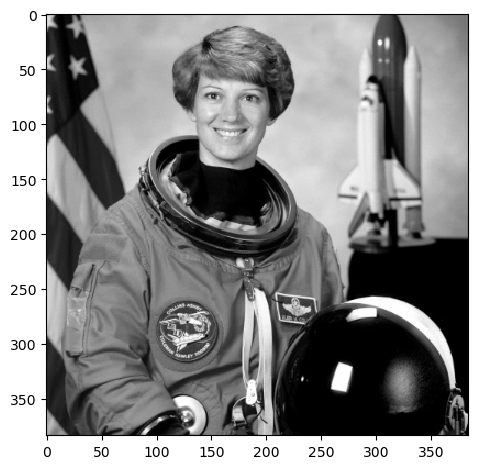

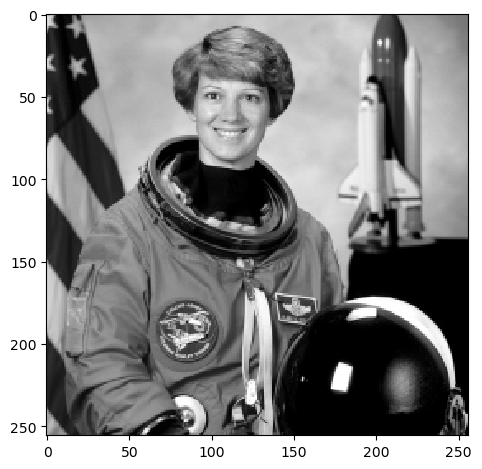

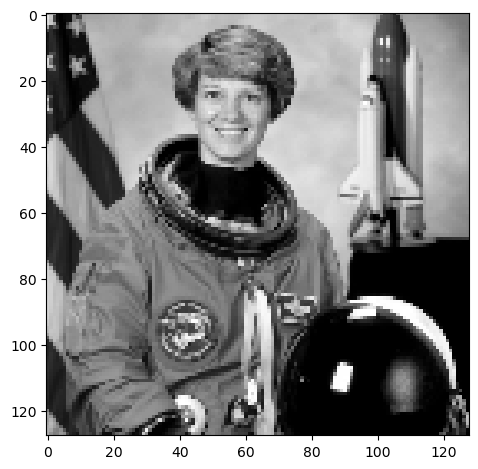

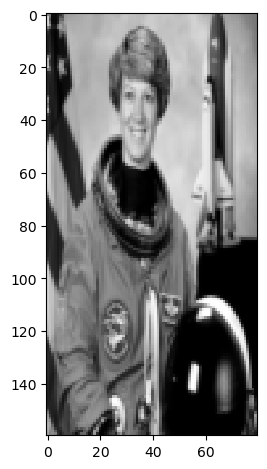

In [15]:
import skimage
from skimage.color import rgb2gray
from skimage.transform import rescale, resize
import os

filename = os.path.join(FILE_PATH,'astronaut.jpg')
from skimage import io
image = io.imread(filename)
grayscale = rgb2gray(image)

# Helper function to rescale and show the given image
def rescale_show(grayscale, scale):
    image_rescaled = rescale(grayscale, scale, anti_aliasing=False)
    skimage.io.imshow(image_rescaled)
    skimage.io.show()

rescale_show(grayscale, 0.75)
rescale_show(grayscale, 0.5)
rescale_show(grayscale, 0.25)

# Resize
image_resized=resize(grayscale, (160, 80), anti_aliasing=True)


# Show resized image
skimage.io.imshow(image_resized)
skimage.io.show()

As can be seen in the images above, the scaling will affect the resolution of the image. __Rescale__ operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis. The __Resize__ operation does the same thing but instead of providing a scaling factor we can supply the dimension of the output image instead.

We also see the effect of using anti aliasing (for resize) and not (for rescale).

## Task 4 - Image thresholding

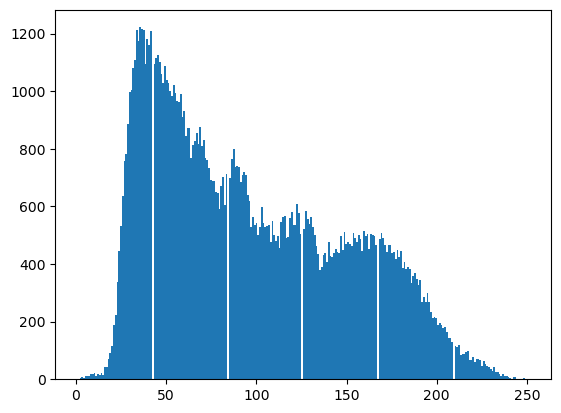

In [4]:
import skimage
import os
import numpy as np
from skimage.color import rgb2gray
from skimage.exposure import histogram
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

filename_path = FILE_PATH
filename = os.path.join(filename_path,'coins.jpg')

from skimage import io

image = io.imread(filename)

ax = plt.hist(image.ravel(), bins = 256)


We observe that a value around 120 (dtype = uint8 i.e. range [0,255]) would cut the distribution in half which should be a good value for thresholding. Let's use that as a start.

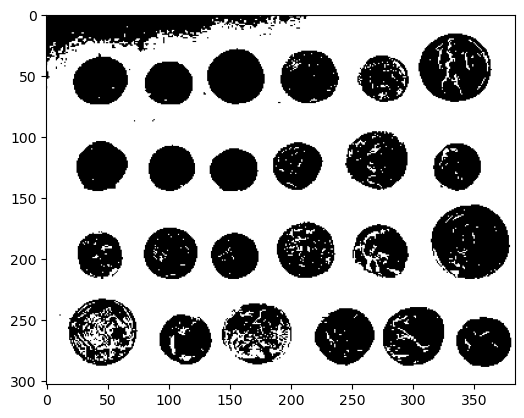

In [5]:
t = 120
binary = image < t
fig, ax = plt.subplots()
plt.imshow(binary, cmap="gray")
plt.show()

## Task 5 - Template matching

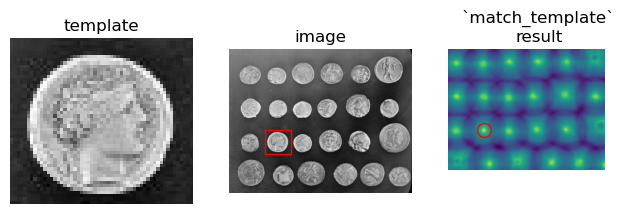

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# skimage has the coins image already embedded
image = data.coins()
# Extract a specific coin from the image
coin = image[170:220, 75:130]
# Run the template match
result = match_template(image, coin)

# Locate the position of the highest result and use unravel_index to get the x,y coordinates
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# Set up subplots
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

# Show the template coin
ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

# Show the full image containing many coins
ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

# Highlight matched region in the image of many coins
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none') 
ax2.add_patch(rect)

# Show what the match template look like
ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
ax3.autoscale(False)
# And highlight the peak/max region as a circle
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()

The template matching function in skimage is using cross correlation to find instances of the template image in the full image. The result of the image matching is the pixel wise correlation with the template image. The maximum/peak of the result corresponds to the center of the coin in the image.

The first subplot just shows the template (i.e. the coin) in isolation.

The second subplot shows the identified coin highlighted in a rectangle on the original image.

The third subplot shows the match_template function values on the original image, clearly showing the different coins identified on the picture.